In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:
df = pd.read_csv('iris.csv')
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
43,5.0,3.5,1.6,0.6,setosa
70,5.9,3.2,4.8,1.8,versicolor
52,6.9,3.1,4.9,1.5,versicolor
41,4.5,2.3,1.3,0.3,setosa
135,7.7,3.0,6.1,2.3,virginica
148,6.2,3.4,5.4,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
66,5.6,3.0,4.5,1.5,versicolor
57,4.9,2.4,3.3,1.0,versicolor
56,6.3,3.3,4.7,1.6,versicolor


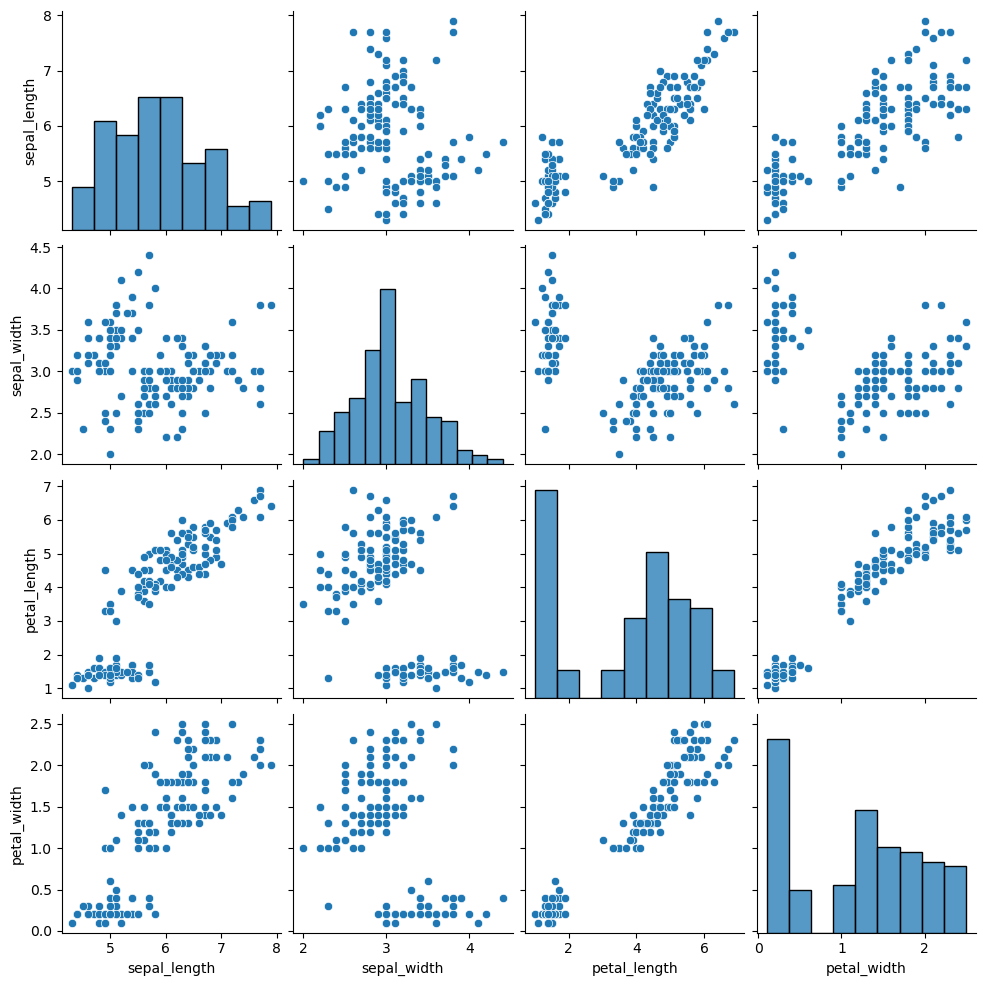

In [13]:
sns.pairplot(df)

In [14]:
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df)
metadata

{
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "columns": {
        "sepal_length": {
            "sdtype": "numerical"
        },
        "sepal_width": {
            "sdtype": "numerical"
        },
        "petal_length": {
            "sdtype": "numerical"
        },
        "petal_width": {
            "sdtype": "numerical"
        },
        "species": {
            "sdtype": "categorical"
        }
    }
}

In [15]:
from sdv.single_table import GaussianCopulaSynthesizer

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(df)

c:\Users\piyus\anaconda3\envs\datascience\Lib\site-packages\sdv\single_table\base.py:120: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
c:\Users\piyus\anaconda3\envs\datascience\Lib\site-packages\sdv\single_table\base.py:105: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [16]:
synthetic_data = synthesizer.sample(num_rows=500)


In [20]:
synthetic_data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
431,5.2,3.1,2.2,0.2,setosa
271,5.7,3.0,5.2,1.2,versicolor
112,6.7,3.0,6.9,2.5,virginica
378,5.2,3.0,4.5,1.6,versicolor
59,5.7,3.1,4.2,1.9,versicolor


In [18]:
synthetic_data.shape

(500, 5)

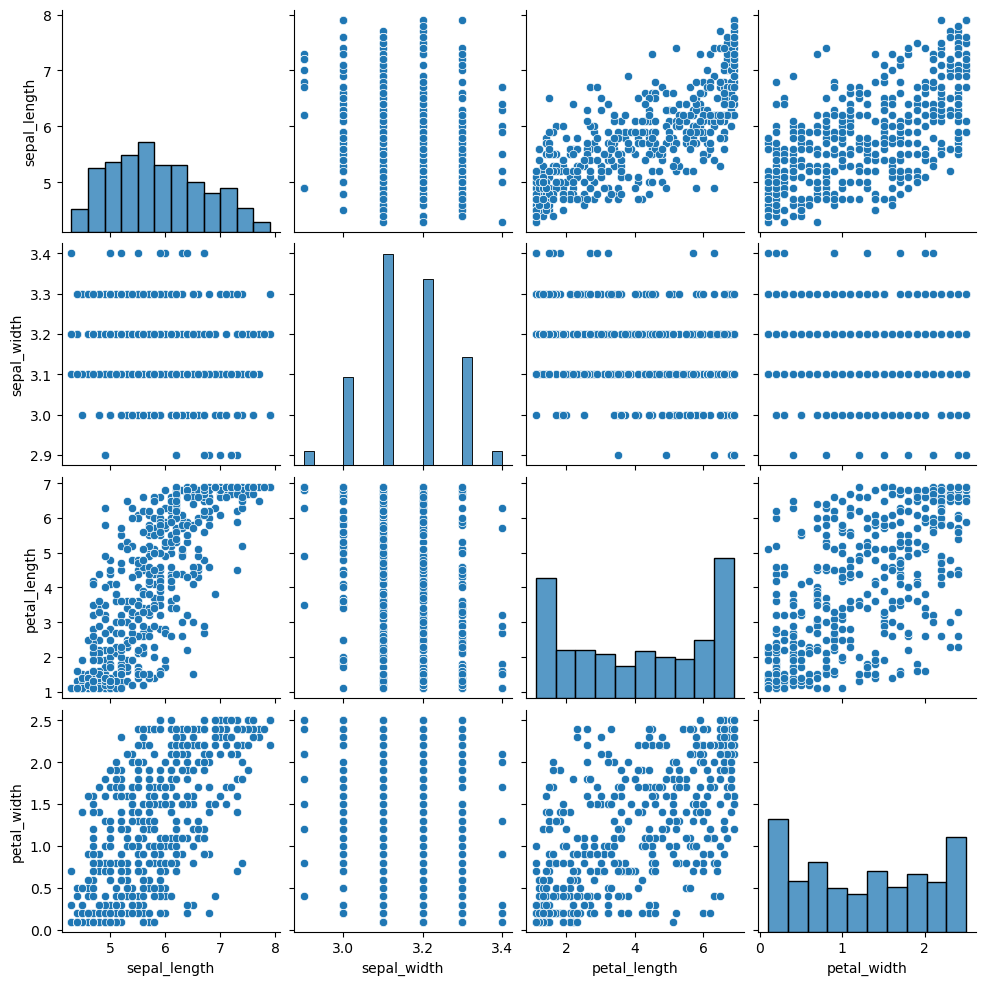

In [19]:
sns.pairplot(synthetic_data)